In [113]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('listings.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


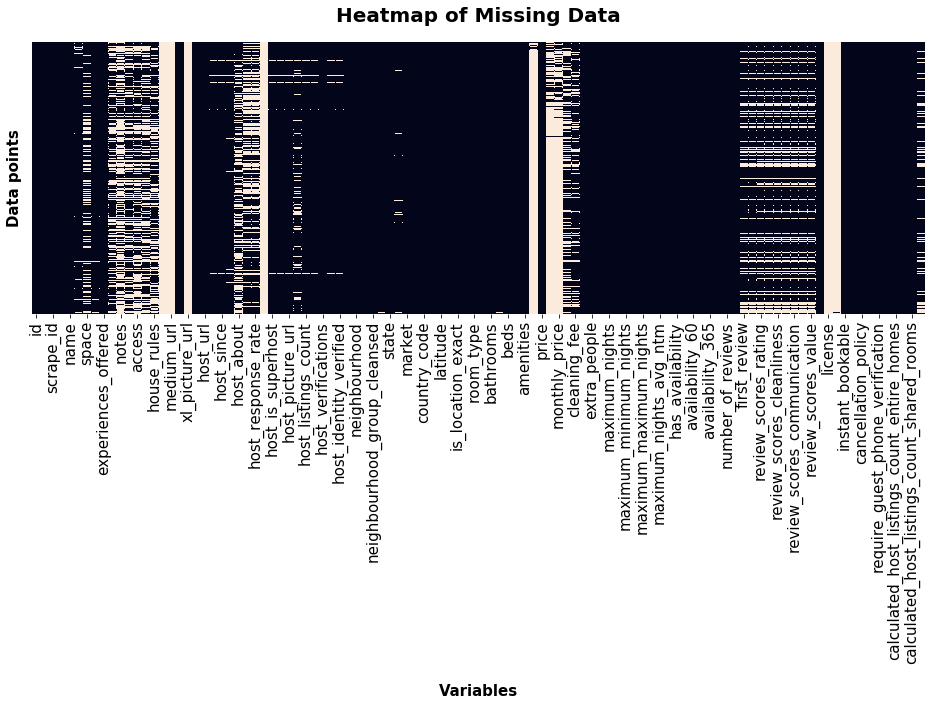

In [5]:
#graphically see the missing data

fig, ax = plt.subplots(figsize=(16, 5))
ax = sns.heatmap(df.isna(), cbar=False)
#plt.xlim(xmax=20)
#plt.grid(axis='y', alpha=0.75, linestyle='-', linewidth=0.2)
plt.xlabel('Variables', fontsize=15, labelpad=20, fontweight='bold')
plt.ylabel('Data points',  labelpad=10, fontsize=15, fontweight='bold')
plt.title('Heatmap of Missing Data', pad=20, fontsize=20, fontweight='bold')
plt.xticks(fontsize=15);
ax.yaxis.set_ticks(np.arange(0, 100, 100));
fig.savefig('Heatmap.jpg', bbox_inches='tight')

In [6]:
df.price = df.price.map(lambda x: x.replace("$", ''))
df.price = df.price.map(lambda x: x.replace(",", ''))
df.price = df.price.map(lambda x: float(x))

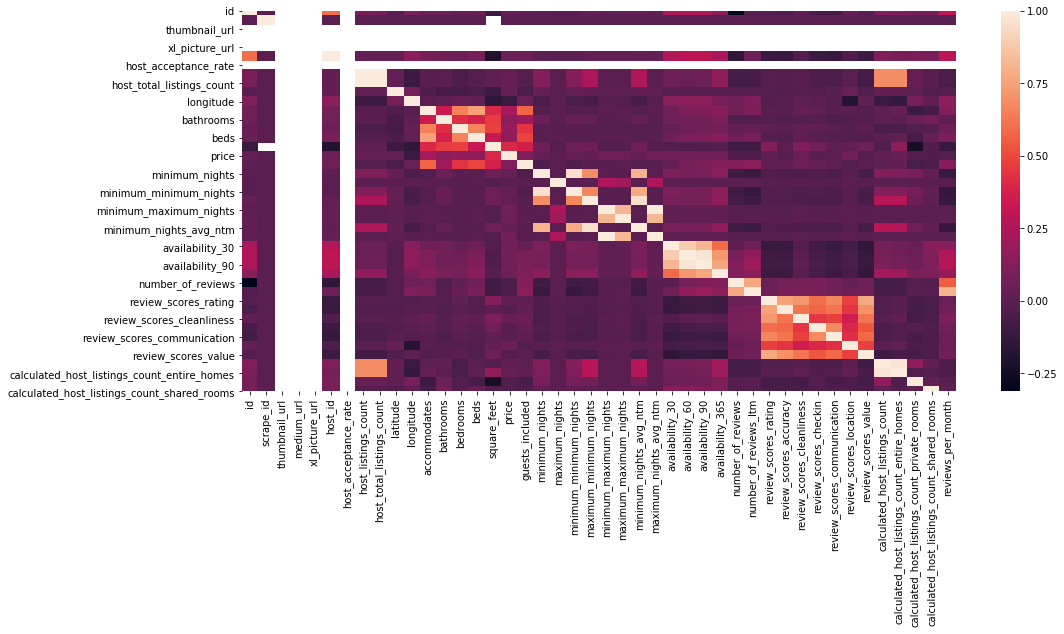

In [7]:
fig, ax = plt.subplots(figsize=(16, 7))
ax = sns.heatmap(df.corr())#cbar=False)


In [ ]:
corr = bikeshare_predictors.corr()

In [8]:
df.isna().mean()

id                                              0.000000
listing_url                                     0.000000
scrape_id                                       0.000000
last_scraped                                    0.000000
name                                            0.000336
                                                  ...   
calculated_host_listings_count                  0.000000
calculated_host_listings_count_entire_homes     0.000000
calculated_host_listings_count_private_rooms    0.000000
calculated_host_listings_count_shared_rooms     0.000000
reviews_per_month                               0.201980
Length: 106, dtype: float64

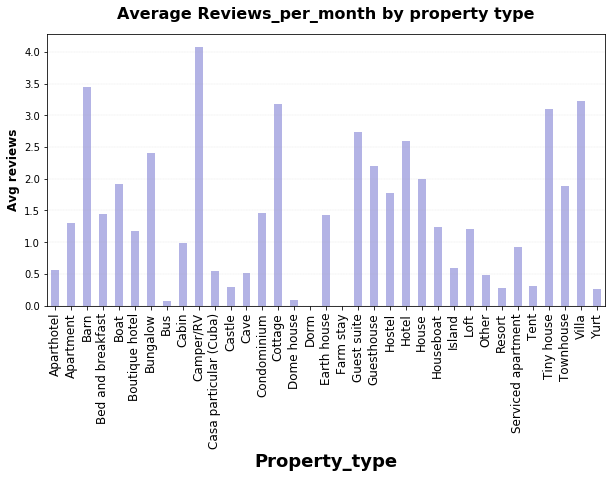

In [9]:

fig, ax = plt.subplots(figsize=(10, 5))
ax = df_proptype = df.groupby('property_type')['reviews_per_month'].mean().plot(kind='bar', color='#0504aa', alpha=0.3);

plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel('Property_type', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Avg reviews', fontsize=12, fontweight='bold')
plt.yticks(fontsize=10)
plt.title('Average Reviews_per_month by property type', pad=15, fontsize=16, fontweight='bold');
fig.savefig('Average Reviews_per_month by property type.jpg', bbox_inches='tight')

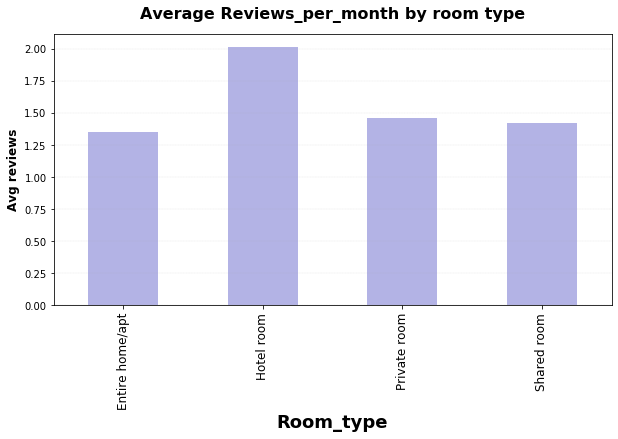

In [10]:

fig, ax = plt.subplots(figsize=(10, 5))
ax = df_proptype = df.groupby('room_type')['reviews_per_month'].mean().plot(kind='bar', color='#0504aa', alpha=0.3);

plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel('Room_type', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Avg reviews', fontsize=12, fontweight='bold')
plt.yticks(fontsize=10)
plt.title('Average Reviews_per_month by room type', pad=15, fontsize=16, fontweight='bold');
fig.savefig('Average Reviews_per_month by room type.jpg', bbox_inches='tight')

# df_proptype = df.groupby('property_type')['reviews_per_month'].mean()
# df_proptype = df.groupby('property_type')['reviews_per_month'].mean().plot(kind='bar')

In [11]:
df.dtypes.value_counts()

object     62
float64    23
int64      21
dtype: int64

In [12]:
# select the datatypes that are integers
df.select_dtypes(include='int').head()

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,20191204162729,2845,1,1,10,1125,10,10,1125,...,1,1,1,1,48,7,1,1,0,0
1,3831,20191204162729,4869,3,1,1,730,1,1,730,...,1,1,1,1,295,75,1,1,0,0
2,5099,20191204162729,7322,2,2,3,21,3,3,21,...,19,19,19,19,78,8,1,1,0,0
3,5121,20191204162729,7356,2,1,29,730,29,29,730,...,30,60,90,365,49,0,1,0,1,0
4,5178,20191204162729,8967,2,1,2,14,1,2,14,...,3,12,40,242,454,47,1,0,1,0


In [13]:
#df['neighbourhood'].unique()
#df['neighbourhood_cleansed'].unique()
df['neighbourhood_group_cleansed'].unique()
#df['city'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

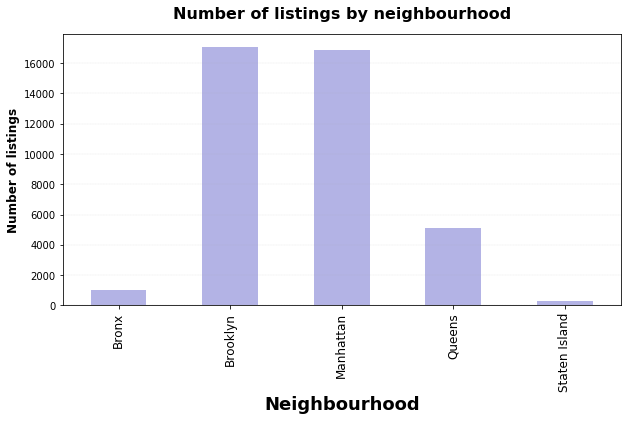

In [14]:
df.groupby('neighbourhood_group_cleansed')['reviews_per_month'].count()

fig, ax = plt.subplots(figsize=(10, 5))
ax = df_proptype = df.groupby('neighbourhood_group_cleansed')['reviews_per_month'].count().plot(kind='bar', color='#0504aa', alpha=0.3);

plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel('Neighbourhood', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Number of listings', fontsize=12, fontweight='bold')
plt.yticks(fontsize=10)
plt.title('Number of listings by neighbourhood', pad=15, fontsize=16, fontweight='bold');
#fig.savefig('Average Reviews_per_month by room type.jpg', bbox_inches='tight')

# df_proptype = df.groupby('property_type')['reviews_per_month'].mean()
# df_proptype = df.groupby('property_type')['reviews_per_month'].mean().plot(kind='bar')

In [15]:
df.groupby('neighbourhood_group_cleansed')['reviews_per_month'].mean()

neighbourhood_group_cleansed
Bronx            1.876471
Brooklyn         1.320179
Manhattan        1.269564
Queens           2.013780
Staten Island    2.004611
Name: reviews_per_month, dtype: float64

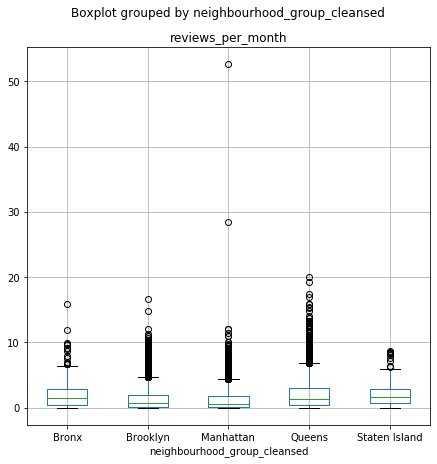

In [16]:
df.boxplot('reviews_per_month',by = 'neighbourhood_group_cleansed',figsize = (7,7))

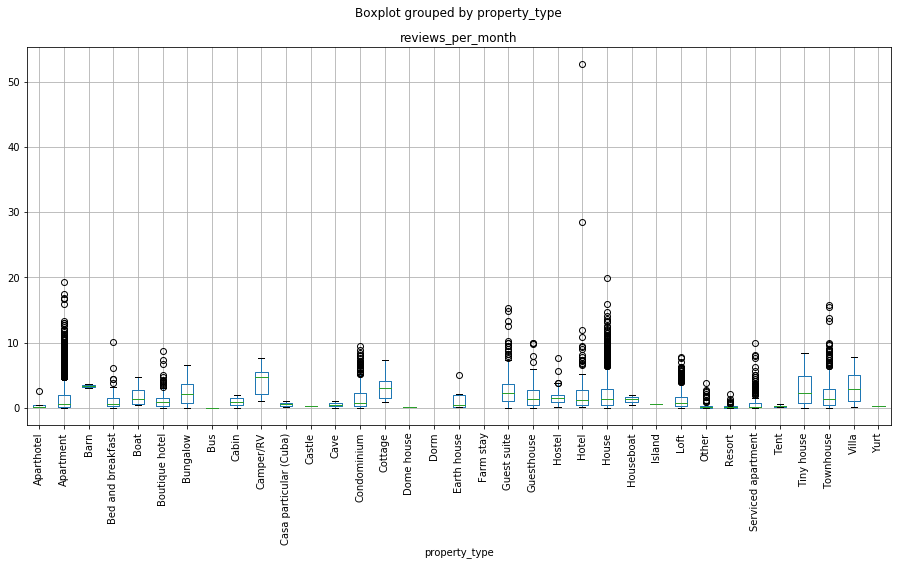

In [17]:
df.boxplot('reviews_per_month',by = 'property_type',figsize = (15,7), rot=90)

neighbourhood_group_cleansed
Bronx            93.270661
Brooklyn         94.276124
Manhattan        93.485337
Queens           93.624801
Staten Island    94.682390
Name: review_scores_rating, dtype: float64


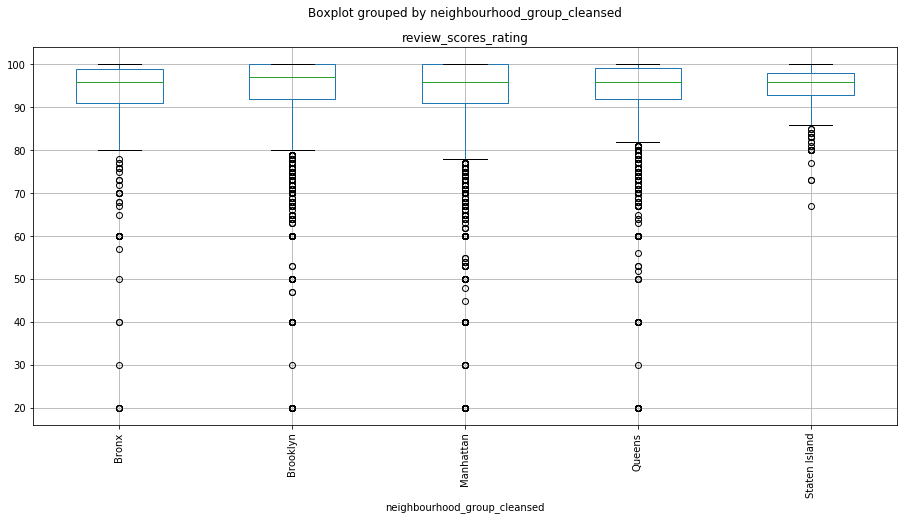

In [18]:
print(df.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean())
df.boxplot('review_scores_rating',by = 'neighbourhood_group_cleansed',figsize = (15,7), rot=90)

In [19]:
gr = df.groupby('property_type')['review_scores_rating'].count()>100
gr = pd.DataFrame(df.groupby('property_type')['review_scores_rating'].count() >100)
gr['property_count'] = np.where(df.groupby('property_type')['review_scores_rating'].count()>=10, df.groupby('property_type')['review_scores_rating'].count(), 0)
gr['avg_rev_rating'] = np.where(df.groupby('property_type')['review_scores_rating'].count()>=10, df.groupby('property_type')['review_scores_rating'].mean(), 0)
gr['avg_price'] = np.where(df.groupby('property_type')['review_scores_rating'].count()>=10, round(df.groupby('property_type')['price'].mean(), 2), 0)
gr['avg_rev_count'] = np.where(df.groupby('property_type')['review_scores_rating'].count()>=10, df.groupby('property_type')['reviews_per_month'].mean(), 0)
gr = gr.drop(['review_scores_rating'], axis=1)
gr = gr[gr.values.sum(axis=1) != 0]
gr

,property_count,avg_rev_rating,avg_price,avg_rev_count
property_type,,,,
Apartment,30713,93.862338,143.86,1.303505
Bed and breakfast,40,94.075000,126.71,1.444390
Boutique hotel,183,87.530055,1128.73,1.182312
Bungalow,31,94.064516,179.85,2.408710
Camper/RV,16,95.687500,97.90,4.079375
Condominium,1263,95.472684,220.61,1.452831
Guest suite,382,95.180628,116.86,2.738727
Guesthouse,58,94.413793,120.12,2.194167
Hostel,57,85.052632,78.94,1.779649


In [20]:
grr = df.groupby('property_type')['reviews_per_month'].mean()
grr.sort_values(ascending=False)

property_type
Camper/RV                 4.079375
Barn                      3.440000
Villa                     3.223913
Cottage                   3.176250
Tiny house                3.100588
Guest suite               2.738727
Hotel                     2.602746
Bungalow                  2.408710
Guesthouse                2.194167
House                     1.989698
Boat                      1.913750
Townhouse                 1.883132
Hostel                    1.779649
Condominium               1.452831
Bed and breakfast         1.444390
Earth house               1.430000
Apartment                 1.303505
Houseboat                 1.233333
Loft                      1.201932
Boutique hotel            1.182312
Cabin                     0.990000
Serviced apartment        0.928798
Island                    0.590000
Aparthotel                0.570000
Casa particular (Cuba)    0.550000
Cave                      0.520000
Other                     0.480580
Tent                      0.308000
Castle

In [21]:
df['room_type'].value_counts()

Entire home/apt    26141
Private room       22785
Shared room         1256
Hotel room           417
Name: room_type, dtype: int64

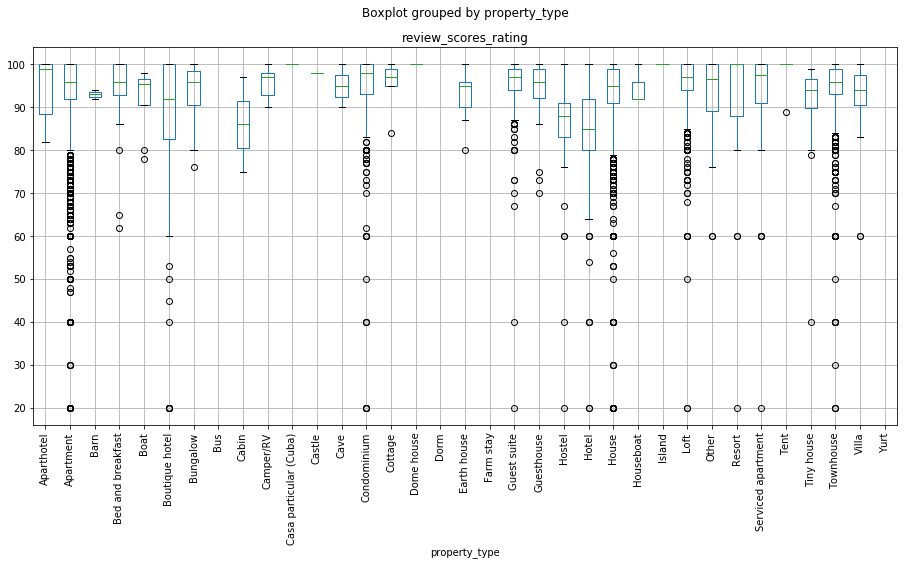

In [22]:
df.boxplot('review_scores_rating',by = 'property_type',figsize = (15,7), rot=90);

In [23]:
print(df['property_type'].count())
print(gr['property_count'].sum())
a = 46482/50599*100
a

50599
39388


91.86347556275815

### ANOVA comparing reviews per month by neibourhood

In [110]:
anova_reviews = ols('reviews_per_month~neighbourhood_group_cleansed',data=df2).fit()
anova_reviews.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      reviews_per_month   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     227.8
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          1.34e-193
Time:                        12:32:19   Log-Likelihood:                -71823.
No. Observations:               37535   AIC:                         1.437e+05
Df Residuals:                   37530   BIC:                         1.437e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         1.8715      0.054     34.690      0.000       1.766       1.977
neighbourhood_group_cleansed[T.Brooklyn]         -0.5582      0.055    -10.065      0.000      -0.667      -0.450
neighbourhood_group_cleansed[T.Manhattan]        -0.6290      0.056    -11.322      0.000      -0.738      -0.520
neighbourhood_group_cleansed[T.Queens]            0.1150      0.059      1.953      0.051      -0.000       0.230
neighbourhood_group_cleansed[T.Staten Island]     0.0814      0.109      0.745      0.456      -0.133       0.295
==============================================================================
Omnibus:                    15229.460   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74750.154
Skew:                           1.938   Prob(JB):                         0.00
Kurtosis:                       8.724   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# examine the anova table
anova_reviews = sm.stats.anova_lm(anova_reviews, type=2)
print(anova_reviews)

                                   df         sum_sq     mean_sq           F  \
neighbourhood_group_cleansed      4.0    2450.640069  612.660017  227.826871   
Residual                      37530.0  100923.698726    2.689147         NaN   

                                     PR(>F)  
neighbourhood_group_cleansed  1.335533e-193  
Residual                                NaN  


In [106]:
data = df2
mc_b = MultiComparison(data['reviews_per_month'], data['neighbourhood_group_cleansed'])
mc_results = mc_b.tukeyhsd()
print(mc_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1      group2    meandiff p-adj  lower upper reject
----------------------------------------------------------
    Bronx      Brooklyn      nan 0.5566   nan   nan  False
    Bronx     Manhattan      nan 0.5566   nan   nan  False
    Bronx        Queens      nan 0.5566   nan   nan  False
    Bronx Staten Island      nan 0.5566   nan   nan  False
 Brooklyn     Manhattan      nan 0.5566   nan   nan  False
 Brooklyn        Queens      nan 0.5566   nan   nan  False
 Brooklyn Staten Island      nan 0.5566   nan   nan  False
Manhattan        Queens      nan 0.5566   nan   nan  False
Manhattan Staten Island      nan 0.5566   nan   nan  False
   Queens Staten Island      nan 0.5566   nan   nan  False
----------------------------------------------------------


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/sandbox/stats/multicomp.py:1317: RuntimeWarning: invalid value encountered in greater
  reject = st_range > q_crit
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/sandbox/stats/multicomp.py:1319: RuntimeWarning: invalid value encountered in greater
  reject2 = np.abs(meandiffs) > crit_int


In [25]:
#sorted(df.price)
df.reviews_per_month.describe()

count    40379.000000
mean         1.405862
std          1.695551
min          0.010000
25%          0.190000
50%          0.740000
75%          2.110000
max         52.630000
Name: reviews_per_month, dtype: float64

neighbourhood_group_cleansed
Bronx             86.948148
Brooklyn         124.384619
Manhattan        210.947621
Queens           100.476598
Staten Island    105.259259
Name: price, dtype: float64


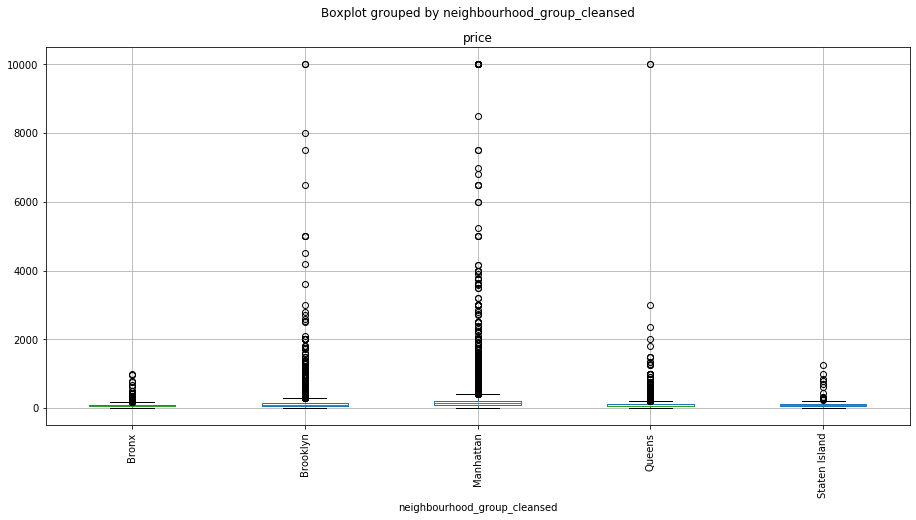

In [26]:
print(df.groupby('neighbourhood_group_cleansed')['price'].mean())
df.boxplot('price',by = 'neighbourhood_group_cleansed',figsize = (15,7), rot=90)

#### Removing price outliers:

(47732, 106)
neighbourhood_group_cleansed
Bronx             80.274624
Brooklyn         106.485687
Manhattan        147.081902
Queens            88.670218
Staten Island     92.005391
Name: price, dtype: float64


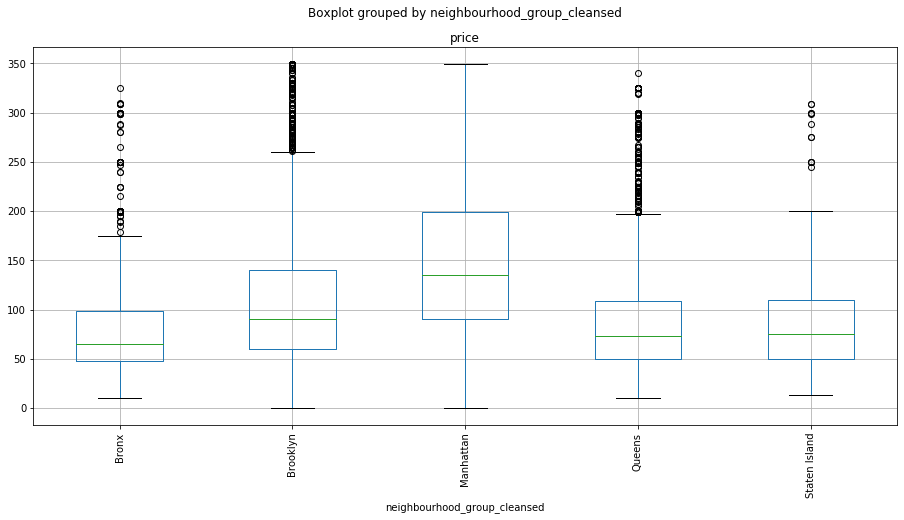

In [27]:
# y = df['price']
# outliers = y.between(y.quantile(0.25), y.quantile(0.75))
# print(str(y[outliers].size) + "/" + str(df.size) + " data points remain.")
# y[outliers].plot().get_figure()

q = df["price"].quantile(0.95)
df1 = df[df["price"] < q]
print(df1.shape)
print(df1.groupby('neighbourhood_group_cleansed')['price'].mean())
df1.boxplot('price',by = 'neighbourhood_group_cleansed',figsize = (15,7), rot=90)


neighbourhood_group_cleansed
Bronx             79.330688
Brooklyn         106.315800
Manhattan        146.382616
Queens            88.339921
Staten Island     92.135057
Name: price, dtype: float64


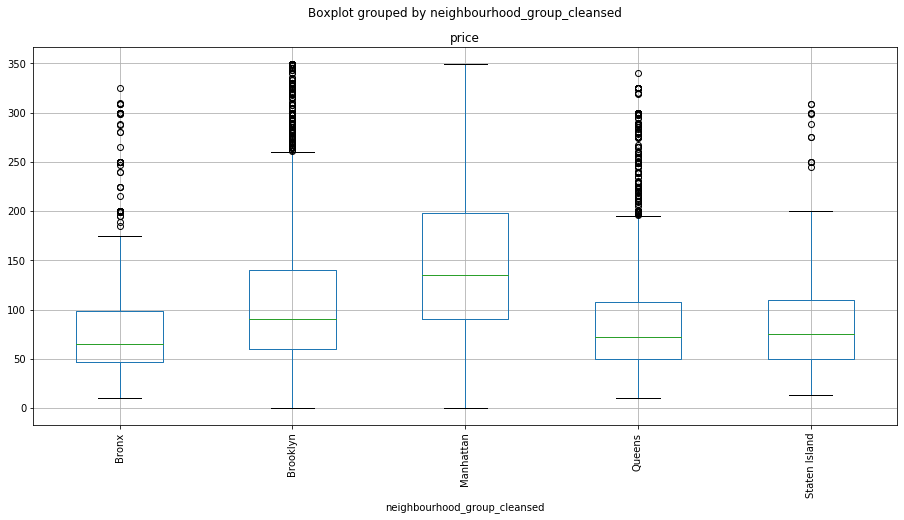

In [97]:


print(df2.groupby('neighbourhood_group_cleansed')['price'].mean())
df2.boxplot('price',by = 'neighbourhood_group_cleansed',figsize = (15,7), rot=90)


In [28]:
df1.shape

(47732, 106)

# ANOVA comparing price by neibourhood

In [93]:
anova_price = ols('price~neighbourhood_group_cleansed',data=df2).fit()
anova_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1493.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:45:35   Log-Likelihood:            -2.5998e+05
No. Observations:               46482   AIC:                         5.200e+05
Df Residuals:                   46477   BIC:                         5.200e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        79.3307      1.930     41.107      0.000      75.548      83.113
neighbourhood_group_cleansed[T.Brooklyn]         26.9851      1.985     13.597      0.000      23.095      30.875
neighbourhood_group_cleansed[T.Manhattan]        67.0519      1.985     33.775      0.000      63.161      70.943
neighbourhood_group_cleansed[T.Queens]            9.0092      2.110      4.271      0.000       4.875      13.144
neighbourhood_group_cleansed[T.Staten Island]    12.8044      3.983      3.215      0.001       4.999      20.610
==============================================================================
Omnibus:                     5343.300   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7371.880
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                       3.530   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# examine the anova table
anova_table_price = sm.stats.anova_lm(anova_price, type=2)
print(anova_table)

                                   df         sum_sq     mean_sq           F  \
neighbourhood_group_cleansed      4.0    2450.640069  612.660017  227.826871   
Residual                      37530.0  100923.698726    2.689147         NaN   

                                     PR(>F)  
neighbourhood_group_cleansed  1.335533e-193  
Residual                                NaN  


##### Calculating a value for HSD, we compare each pair wise mean difference with the HSD difference. If the pairwise mean difference exceeds the HSD, then they are significantly different.

In [98]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [105]:
data = df2
mc = MultiComparison(data['price'], data['neighbourhood_group_cleansed'])
mc_results = mc.tukeyhsd()
print(mc_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1      group2    meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
    Bronx      Brooklyn  26.9851  0.001  21.5715  32.3988   True
    Bronx     Manhattan  67.0519  0.001  61.6364  72.4675   True
    Bronx        Queens   9.0092  0.001   3.2547  14.7637   True
    Bronx Staten Island  12.8044 0.0114   1.9406  23.6681   True
 Brooklyn     Manhattan  40.0668  0.001  38.2756  41.8581   True
 Brooklyn        Queens -17.9759  0.001 -20.6207 -15.3311   True
 Brooklyn Staten Island -14.1807  0.001 -23.7673  -4.5942   True
Manhattan        Queens -58.0427  0.001 -60.6913 -55.3941   True
Manhattan Staten Island -54.2476  0.001 -63.8352 -44.6599   True
   Queens Staten Island   3.7951 0.8048  -5.9879  13.5782  False
----------------------------------------------------------------


property_type
Aparthotel                276.545455
Apartment                 121.626526
Barn                      105.000000
Bed and breakfast         106.962264
Boat                      141.875000
Boutique hotel            176.065891
Bungalow                  124.696970
Bus                       175.500000
Cabin                      76.500000
Camper/RV                  97.900000
Casa particular (Cuba)     82.750000
Castle                     83.000000
Cave                      198.333333
Condominium               148.599857
Cottage                   174.000000
Dome house                 60.000000
Dorm                       38.000000
Earth house                68.800000
Farm stay                  70.000000
Guest suite               109.197150
Guesthouse                 88.142857
Hostel                     74.419355
Hotel                     152.572193
House                      90.788009
Houseboat                 192.500000
Loft                      140.674148
Other                   

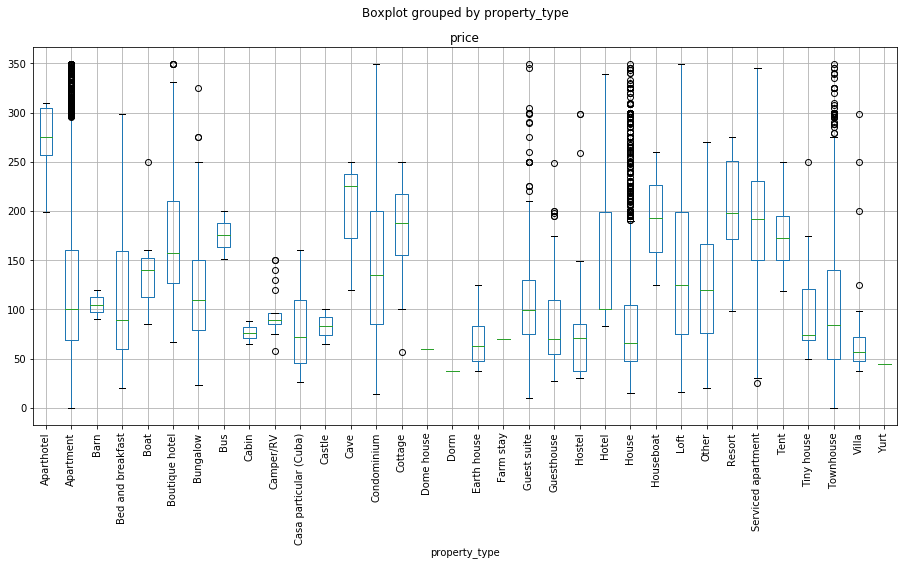

In [29]:
print(df1.groupby('property_type')['price'].mean())
df1.boxplot('price',by = 'property_type',figsize = (15,7), rot=90)

In [30]:
ny = df[['host_listings_count','zipcode','latitude',
 'longitude','accommodates','bathrooms','bedrooms',
 'beds','price', 'availability_365', 'minimum_minimum_nights', 'maximum_minimum_nights',
 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm', 'review_scores_rating', 'review_scores_accuracy',
 'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
 'review_scores_location','review_scores_value','reviews_per_month' ]]

In [31]:
outcome = 'review_scores_rating'
x_cols = ['host_listings_count','accommodates','bathrooms','bedrooms',
 'beds','price', 'availability_365', 'minimum_minimum_nights', 'maximum_minimum_nights',
 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm', 'reviews_per_month' ]

# outcome = 'review_scores_rating'
# x_cols = ['host_listings_count','accommodates','bathrooms','bedrooms',
#  'beds','price', 'availability_365', 'minimum_minimum_nights', 'maximum_minimum_nights',
#  'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
#  'maximum_nights_avg_ntm', 'review_scores_accuracy',
#  'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
#  'review_scores_location','review_scores_value','reviews_per_month' ]

In [32]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=ny.dropna()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.016
Model:                              OLS   Adj. R-squared:                  0.016
Method:                   Least Squares   F-statistic:                     45.31
Date:                  Wed, 15 Jan 2020   Prob (F-statistic):          3.08e-125
Time:                          11:13:14   Log-Likelihood:            -1.3727e+05
No. Observations:                 38461   AIC:                         2.746e+05
Df Residuals:                     38446   BIC:                         2.747e+05
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 94.4422      0.136    693.523      0.000      94.175      94.709
host_listings_count        0.0010      0.001      1.142      0.254      -0.001       0.003
accommodates               0.0071      0.038      0.189      0.850      -0.067       0.081
bathrooms                 -0.3633      0.116     -3.130      0.002      -0.591      -0.136
bedrooms                   0.5074      0.085      5.934      0.000       0.340       0.675
beds                      -0.3021      0.061     -4.971      0.000      -0.421      -0.183
price                      0.0007      0.000      3.846      0.000       0.000       0.001
availability_365          -0.0071      0.000    -20.919      0.000      -0.008      -0.006
minimum_minimum_nights     0.0069      0.005      1.369      0.171      -0.003       0.017
maximum_minimum_nights     0.0052      0.012      0.448      0.654      -0.018       0.028
minimum_maximum_nights -2.832e-07   5.68e-07     -0.498      0.618    -1.4e-06    8.31e-07
maximum_maximum_nights -4.945e-09   1.33e-08     -0.372      0.710    -3.1e-08    2.11e-08
minimum_nights_avg_ntm    -0.0167      0.014     -1.164      0.245      -0.045       0.011
maximum_nights_avg_ntm  2.849e-07   5.81e-07      0.490      0.624   -8.55e-07    1.42e-06
reviews_per_month          0.3008      0.027     11.313      0.000       0.249       0.353
==============================================================================
Omnibus:                    29926.788   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           780427.577
Skew:                          -3.584   Prob(JB):                         0.00
Kurtosis:                      23.872   Cond. No.                     1.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
df2 = df1[df1['property_type'].isin(['Apartment','House', 'Townhouse', 'Condominium','Loft', 'Guest suit', 'Boutique hotel','Other']) ]

In [34]:
df2.shape

(46482, 106)

In [36]:
name = 'room_type'
print(df2[name].unique())
print('\n')
print(df2[name].count())
#print(df2[name].unique())

['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


46482


In [37]:
df2['property_type'].value_counts()

Apartment         38091
House              3953
Townhouse          1491
Condominium        1402
Loft               1203
Boutique hotel      258
Other                84
Name: property_type, dtype: int64

### Creating dummy variables

In [388]:
df2['instant_dummy'] = pd.get_dummies(df2['instant_bookable'], drop_first=True)
df2['Manhattan_dummy'] = np.where(df2['neighbourhood_group_cleansed']=='Manhattan', 1, 0)
df2['Brooklyn_dummy'] = np.where(df2['neighbourhood_group_cleansed']=='Brooklyn', 1, 0)
df2['Queens_dummy'] = np.where(df2['neighbourhood_group_cleansed']=='Queens', 1, 0)
df2['Bronx_dummy'] = np.where(df2['neighbourhood_group_cleansed']=='Bronx', 1, 0)
df2['Apartment_dummy'] = np.where(df2['property_type']=='Apartment', 1, 0)
df2['House_dummy'] = np.where(df2['property_type']=='House', 1, 0)
df2['Boutique_dummy'] = np.where(df2['property_type']=='Boutique hotel', 1, 0)
df2['Private_dummy'] = np.where(df2['room_type']=='Private room', 1, 0)
df2['Shared_dummy'] = np.where(df2['room_type']=='Shared room', 1, 0)
df2['Entire_dummy'] = np.where(df2['room_type']=='Entire home/apt', 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [386]:
df2['neighbourhood_group_cleansed'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [360]:
df2['room_type'].unique()
print(Apartment_dummy.describe())
print(House_dummy.describe())

       Apartment_True
count    46482.000000
mean         0.819479
std          0.384625
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
         House_True
count  46482.000000
mean       0.085044
std        0.278950
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


# Final equation for Price

In [375]:
#property_dummy is significant for Apartment and Butique hotels
price_reg = ols(formula = 'price~square_feet+Manhattan_dummy+Entire_dummy+bedrooms',data=df2).fit()

price_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     73.62
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           3.24e-45
Time:                        16:27:19   Log-Likelihood:                -1913.7
No. Observations:                 355   AIC:                             3837.
Df Residuals:                     350   BIC:                             3857.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          43.4387      7.413      5.860      0.000      28.859      58.018
square_feet         0.0256      0.007      3.784      0.000       0.012       0.039
Manhattan_dummy    32.1764      5.900      5.454      0.000      20.572      43.781
Entire_dummy       73.0694      6.471     11.292      0.000      60.343      85.796
bedrooms           19.8412      4.469      4.439      0.000      11.051      28.631
==============================================================================
Omnibus:                       26.358   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.319
Skew:                           0.658   Prob(JB):                     2.61e-07
Kurtosis:                       3.564   Cond. No.                     2.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Check for multicollinearity for Square_feet and Bedrooms

In [376]:
df22 = pd.DataFrame(df2, columns=['square_feet','neighbourhood_group_cleansed', 'room_type', 'property_type', 'bedrooms'])
df22.corr()

,square_feet,bedrooms
square_feet,1.000000,0.388788
bedrooms,0.388788,1.000000


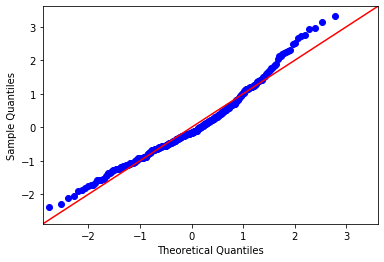

In [377]:
fig = sm.graphics.qqplot(price_reg.resid, dist=stats.norm, line='45', fit=True)

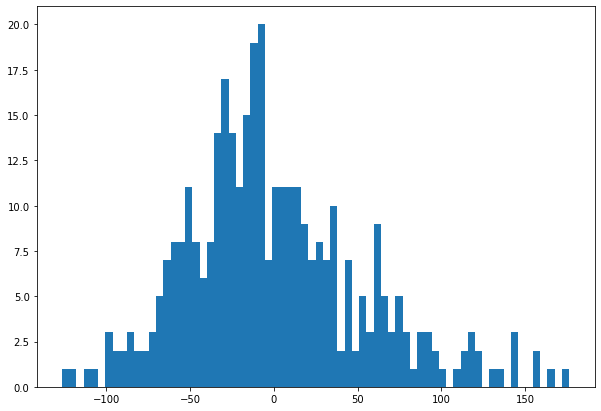

In [403]:
plt.figure(figsize=(10,7))
plt.hist(price_reg.resid, bins=70);


In [397]:
li

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


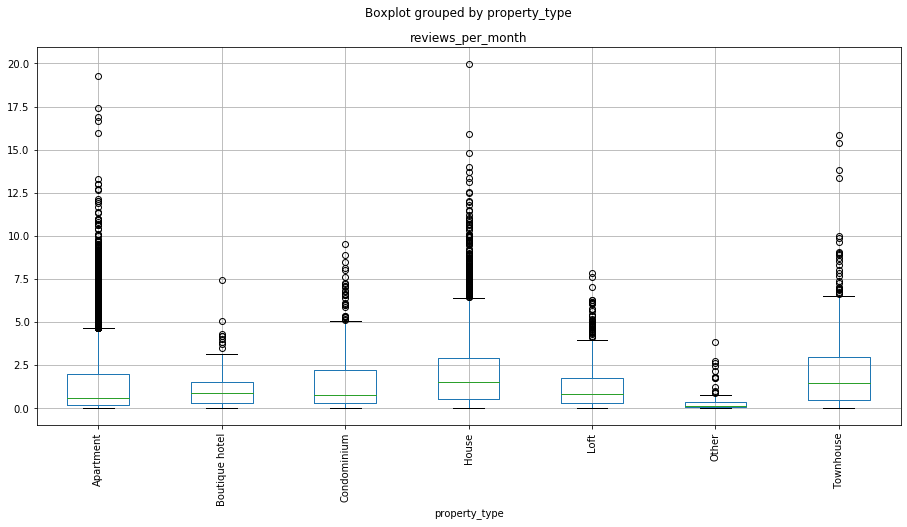

In [400]:
df2.boxplot('reviews_per_month',by = 'property_type',figsize = (15,7), rot=90);

### Removing outliers for 'reviews per month' data

(46482, 122)
(35650, 122)
76.6963555785035


neighbourhood_group_cleansed
Bronx            1.544977
Brooklyn         1.115714
Manhattan        1.030832
Queens           1.437448
Staten Island    1.624910
Name: reviews_per_month, dtype: float64


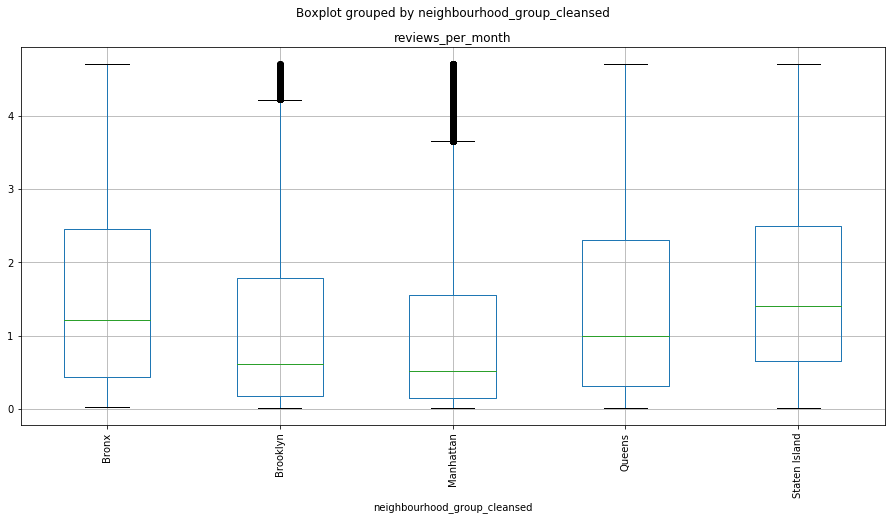

In [462]:
# y = df['price']
# outliers = y.between(y.quantile(0.25), y.quantile(0.75))
# print(str(y[outliers].size) + "/" + str(df.size) + " data points remain.")
# y[outliers].plot().get_figure()

q = df2["reviews_per_month"].quantile(0.95)
df3 = df2[df2["reviews_per_month"] < q]
print(df2.shape)
print(df3.shape)
sh = df3.shape[0]/df2.shape[0]*100
print(sh)
print('\n')
print(df3.groupby('neighbourhood_group_cleansed')['reviews_per_month'].mean())
df3.boxplot('reviews_per_month',by = 'neighbourhood_group_cleansed',figsize = (15,7), rot=90)


### Normalization of data (reviews per month)

In [463]:
# for col in x_cols:
#     stats_df[col] = (stats_df[col] - stats_df[col].mean())/stats_df[col].std()

In [464]:
# for col in x_cols:
#     stats_df[col] = (stats_df[col] - stats_df[col].mean())/stats_df[col].std()

#df2['norm_reviews_per_month'] = (df2['price']-df2['price'].mean())/df2['price'].std()
df3['norm_reviews_per_month'] = (df3['price']-df3['price'].mean())/df3['price'].std()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [467]:
li

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


# Final equation for Reviews

In [474]:
#results_rev = ols(formula = 'reviews_per_month~instant_dummy+property_dummy+bedrooms',data=df2).fit()
results_rev = ols(formula = 'norm_reviews_per_month~instant_dummy+Manhattan_dummy+Brooklyn_dummy+review_scores_rating+Apartment_dummy+House_dummy+bedrooms+Shared_dummy+Entire_dummy',data=df3).fit()
results_rev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     norm_reviews_per_month   R-squared:                       0.517
Model:                                OLS   Adj. R-squared:                  0.517
Method:                     Least Squares   F-statistic:                     4139.
Date:                    Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                            18:00:21   Log-Likelihood:                -36624.
No. Observations:                   34741   AIC:                         7.327e+04
Df Residuals:                       34731   BIC:                         7.335e+04
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.5548      0.044    -35.590      0.000      -1.640      -1.469
instant_dummy            0.0167      0.008      2.143      0.032       0.001       0.032
Manhattan_dummy          0.6888      0.012     57.190      0.000       0.665       0.712
Brooklyn_dummy           0.1721      0.011     15.006      0.000       0.150       0.195
review_scores_rating     0.0052      0.000     12.292      0.000       0.004       0.006
Apartment_dummy         -0.2840      0.013    -22.567      0.000      -0.309      -0.259
House_dummy             -0.2215      0.018    -12.448      0.000      -0.256      -0.187
bedrooms                 0.3622      0.006     61.047      0.000       0.351       0.374
Shared_dummy            -0.3491      0.025    -13.991      0.000      -0.398      -0.300
Entire_dummy             1.0902      0.008    139.036      0.000       1.075       1.106
==============================================================================
Omnibus:                     4653.076   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9938.334
Skew:                           0.817   Prob(JB):                         0.00
Kurtosis:                       5.049   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

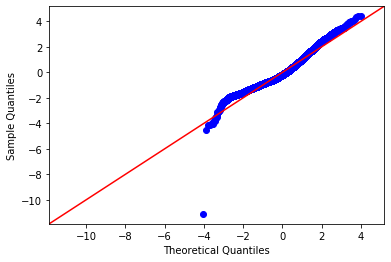

In [466]:
fig = sm.graphics.qqplot(results_rev.resid, dist=stats.norm, line='45', fit=True)

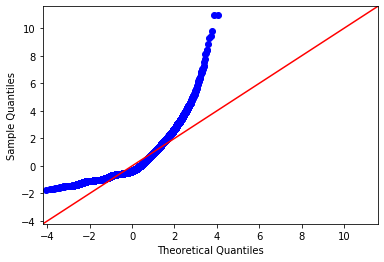

In [183]:
fig = sm.graphics.qqplot(results_rev.resid, dist=stats.norm, line='45', fit=True)

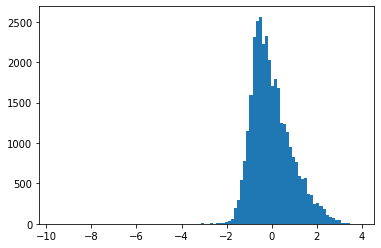

In [459]:
#ii = [math.exp(round(i,0)) for i in list(results_rev.resid)]
ii = pd.Series(results_rev.resid)
plt.hist(ii, bins=100)

# log_dist = np.random.lognormal(3,1,10000)
# plt.hist(log_dist, bins = 1000);
plt.show()

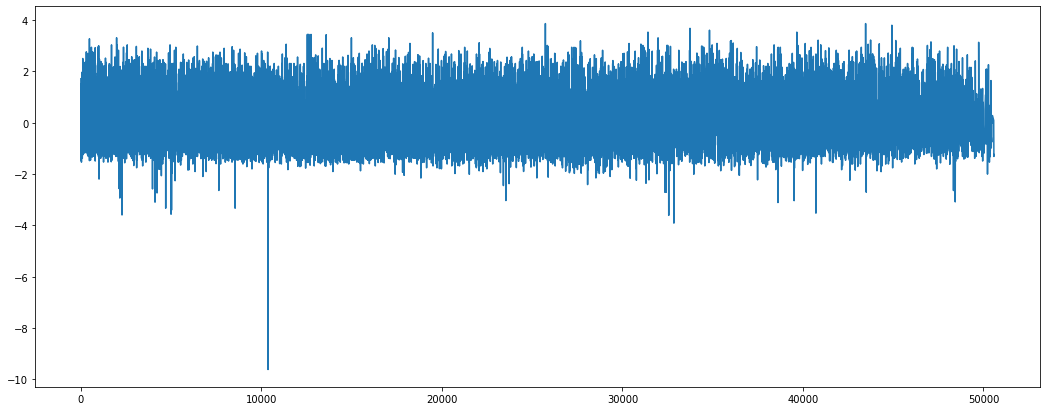

In [460]:
#list(results_rev.resid)
plt.figure(figsize=(18,7))
plt.plot(results_rev.resid)


In [49]:
gr.sort_values(by=['property_count'], ascending=False)
gr.sort_values(by=['avg_rev_rating'], ascending=False)
gr.sort_values(by=['avg_price'], ascending=False)
gr.sort_values(by=['avg_rev_count'], ascending=False)
gr['avg_revenue']=round((gr['avg_price']*gr['avg_rev_count']*6), 2)
gr.sort_values(by=['avg_revenue'], ascending=False)

,property_count,avg_rev_rating,avg_price,avg_rev_count,avg_revenue
property_type,,,,,
Boutique hotel,183,87.530055,1128.73,1.182312,8007.06
Villa,23,91.347826,405.00,3.223913,7834.11
Hotel,142,84.021127,276.39,2.602746,4316.24
Bungalow,31,94.064516,179.85,2.408710,2599.24
Camper/RV,16,95.687500,97.90,4.079375,2396.22
Townhouse,1465,94.540614,193.75,1.883132,2189.14
Condominium,1263,95.472684,220.61,1.452831,1923.05
Guest suite,382,95.180628,116.86,2.738727,1920.29
Tiny house,16,89.375000,98.40,3.100588,1830.59


## Apartment

In [50]:
df2_apt = df2.loc[df2['property_type'] == 'Apartment']
df2_apt.shape

(38091, 106)

In [51]:
borough_dummy_apt = pd.get_dummies(df2_apt['neighbourhood_group_cleansed'],prefix = 'neighbourhood_group_cleansed', drop_first=True)
instant_dummy_apt = pd.get_dummies(df2_apt['instant_bookable'],prefix = 'instant_bookable', drop_first=True)
room_dummy_apt = pd.get_dummies(df2_apt['room_type'],prefix = 'room_type', drop_first=True)

In [52]:
#property_dummy is significant for Apartment and Butique hotels
regres_price = ols(formula = 'price~square_feet+borough_dummy_apt+room_dummy_apt+bedrooms',data=df2_apt).fit()

regres_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     25.39
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           5.86e-29
Time:                        11:13:34   Log-Likelihood:                -1478.7
No. Observations:                 275   AIC:                             2975.
Df Residuals:                     266   BIC:                             3008.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               82.2157     28.179      2.918      0.004      26.734     137.697
square_feet              0.0352      0.009      3.888      0.000       0.017       0.053
borough_dummy_apt[0]    25.9802     27.377      0.949      0.343     -27.922      79.883
borough_dummy_apt[1]    53.4790     27.259      1.962      0.051      -0.191     107.149
borough_dummy_apt[2]    27.0959     28.825      0.940      0.348     -29.657      83.849
borough_dummy_apt[3]     6.4770     40.668      0.159      0.874     -73.595      86.549
room_dummy_apt[0]      -67.9049      7.562     -8.979      0.000     -82.795     -53.015
room_dummy_apt[1]      -58.2824     27.464     -2.122      0.035    -112.358      -4.207
bedrooms                20.1360      5.884      3.422      0.001       8.551      31.721
==============================================================================
Omnibus:                       21.726   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.065
Skew:                           0.653   Prob(JB):                     3.61e-06
Kurtosis:                       3.693   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
results = ols(formula = 'reviews_per_month~instant_dummy_apt+room_dummy_apt+bedrooms',data=df2_apt).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      reviews_per_month   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     506.2
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:47:32   Log-Likelihood:                -56379.
No. Observations:               30404   AIC:                         1.128e+05
Df Residuals:                   30399   BIC:                         1.128e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7864      0.022     36.401      0.000       0.744       0.829
instant_dummy_apt     0.7854      0.018     42.583      0.000       0.749       0.822
room_dummy_apt[0]     0.0549      0.018      3.023      0.003       0.019       0.091
room_dummy_apt[1]     0.1283      0.061      2.097      0.036       0.008       0.248
bedrooms              0.1795      0.015     12.370      0.000       0.151       0.208
==============================================================================
Omnibus:                    11795.582   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54497.531
Skew:                           1.863   Prob(JB):                         0.00
Kurtosis:                       8.397   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

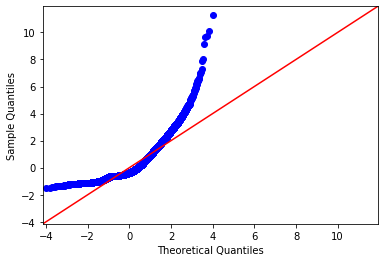

In [124]:
fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)

In [54]:
df2_apt['bedrooms'].value_counts()
df2['bedrooms'].value_counts()

1.0     34531
2.0      5777
0.0      4258
3.0      1526
4.0       271
5.0        39
6.0        15
7.0         2
8.0         2
10.0        1
21.0        1
9.0         1
Name: bedrooms, dtype: int64

In [55]:
gr

,property_count,avg_rev_rating,avg_price,avg_rev_count,avg_revenue
property_type,,,,,
Apartment,30713,93.862338,143.86,1.303505,1125.13
Bed and breakfast,40,94.075000,126.71,1.444390,1098.11
Boutique hotel,183,87.530055,1128.73,1.182312,8007.06
Bungalow,31,94.064516,179.85,2.408710,2599.24
Camper/RV,16,95.687500,97.90,4.079375,2396.22
Condominium,1263,95.472684,220.61,1.452831,1923.05
Guest suite,382,95.180628,116.86,2.738727,1920.29
Guesthouse,58,94.413793,120.12,2.194167,1581.38
Hostel,57,85.052632,78.94,1.779649,842.91


In [56]:
df2['property_type'].value_counts()

Apartment         38091
House              3953
Townhouse          1491
Condominium        1402
Loft               1203
Boutique hotel      258
Other                84
Name: property_type, dtype: int64

In [57]:
df2['room_type'].value_counts()

Entire home/apt    23048
Private room       22131
Shared room         1191
Hotel room           112
Name: room_type, dtype: int64

In [58]:
df2_house = df2.loc[df2['property_type'] == 'House']
df2_house.shape

(3953, 106)

In [59]:
borough_dummy_house = pd.get_dummies(df2_house['neighbourhood_group_cleansed'],prefix = 'neighbourhood_group_cleansed', drop_first=True)
instant_dummy_house = pd.get_dummies(df2_house['instant_bookable'],prefix = 'instant_bookable', drop_first=True)
room_dummy_house = pd.get_dummies(df2_house['room_type'],prefix = 'room_type', drop_first=True)

In [60]:
#property_dummy is significant for Apartment and Butique hotels
regres_price_house = ols(formula = 'price~beds+square_feet',data=df2_house).fit()
#regres_price_house = ols(formula = 'price~square_feet+borough_dummy_house+room_dummy_house+bedrooms_dummy_house+beds_dummy_house',data=df2_house).fit()

regres_price_house.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     13.47
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           0.000134
Time:                        11:13:42   Log-Likelihood:                -138.60
No. Observations:                  26   AIC:                             283.2
Df Residuals:                      23   BIC:                             287.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      45.1897     18.390      2.457      0.022       7.147      83.233
beds           21.8961      5.670      3.862      0.001      10.167      33.625
square_feet     0.0397      0.016      2.531      0.019       0.007       0.072
==============================================================================
Omnibus:                       20.927   Durbin-Watson:                   1.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.202
Skew:                           1.879   Prob(JB):                     1.24e-06
Kurtosis:                       6.316   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
df2_entire = df2.loc[df2['room_type'] == 'Entire home/apt']
df2_entire.shape

(23048, 106)

In [63]:
df2_private = df2.loc[df2['room_type'] == 'Private room']
df2_private.shape

(22131, 106)

In [64]:
df2_shared = df2.loc[df2['room_type'] == 'Shared room']
df2_shared.shape

(1191, 106)

In [65]:
borough_dummy_entire = pd.get_dummies(df2_entire['neighbourhood_group_cleansed'],prefix = 'neighbourhood_group_cleansed', drop_first=True)
instant_dummy_entire = pd.get_dummies(df2_entire['instant_bookable'],prefix = 'instant_bookable', drop_first=True)

### Entire house/apartment

In [66]:
regres_price_entire = ols(formula = 'price~bedrooms+square_feet',data=df2_entire).fit()
#regres_price_house = ols(formula = 'price~square_feet+borough_dummy_house+room_dummy_house+bedrooms_dummy_house+beds_dummy_house',data=df2_house).fit()

regres_price_entire.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     15.36
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           5.39e-07
Time:                        11:13:47   Log-Likelihood:                -1313.5
No. Observations:                 238   AIC:                             2633.
Df Residuals:                     235   BIC:                             2643.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     132.5241      9.268     14.299      0.000     114.264     150.784
bedrooms       11.0011      5.403      2.036      0.043       0.357      21.645
square_feet     0.0391      0.011      3.611      0.000       0.018       0.060
==============================================================================
Omnibus:                        9.813   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.397
Skew:                           0.502   Prob(JB):                      0.00552
Kurtosis:                       2.795   Cond. No.                     2.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

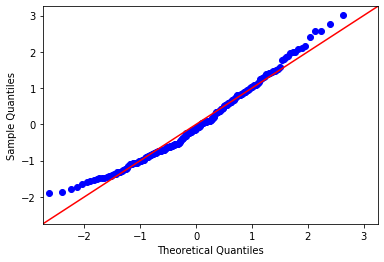

In [116]:
fig = sm.graphics.qqplot(regres_price_entire.resid, dist=stats.norm, line='45', fit=True)

### Private room

In [67]:
borough_dummy_private = pd.get_dummies(df2_private['neighbourhood_group_cleansed'],prefix = 'neighbourhood_group_cleansed', drop_first=True)
borough_dummy_private = pd.DataFrame(borough_dummy_private, columns=['neighbourhood_group_cleansed_Brooklyn', 'neighbourhood_group_cleansed_Manhattan', 'neighbourhood_group_cleansed_Queens'])
instant_dummy_private = pd.get_dummies(df2_private['instant_bookable'],prefix = 'instant_bookable', drop_first=True)

In [68]:
borough_dummy_private

,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens
3,1,0,0
4,0,1,0
5,0,1,0
7,0,1,0
8,1,0,0
...,...,...,...
50586,0,0,1
50587,1,0,0
50590,0,1,0
50591,0,1,0


In [69]:
regres_price_private = ols(formula = 'price~bedrooms+borough_dummy_private',data=df2_private).fit()
#regres_price_house = ols(formula = 'price~square_feet+borough_dummy_house+room_dummy_house+bedrooms_dummy_house+beds_dummy_house',data=df2_house).fit()

regres_price_private.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     743.7
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:13:49   Log-Likelihood:            -1.1139e+05
No. Observations:               22110   AIC:                         2.228e+05
Df Residuals:                   22105   BIC:                         2.228e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   50.7951      1.518     33.461      0.000      47.820      53.771
bedrooms                    10.4204      0.817     12.757      0.000       8.819      12.022
borough_dummy_private[0]     8.7826      1.321      6.647      0.000       6.193      11.373
borough_dummy_private[1]    34.4420      1.339     25.716      0.000      31.817      37.067
borough_dummy_private[2]     2.9043      1.415      2.052      0.040       0.131       5.678
==============================================================================
Omnibus:                    10278.577   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69458.783
Skew:                           2.139   Prob(JB):                         0.00
Kurtosis:                      10.557   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

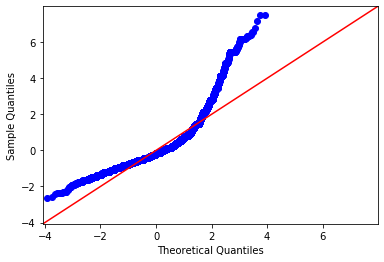

In [115]:
fig = sm.graphics.qqplot(regres_price_private.resid, dist=stats.norm, line='45', fit=True)

### Shared room

In [70]:
borough_dummy_shared = pd.get_dummies(df2_shared['neighbourhood_group_cleansed'],prefix = 'neighbourhood_group_cleansed', drop_first=True)
borough_dummy_shared = pd.DataFrame(borough_dummy_shared, columns=['neighbourhood_group_cleansed_Manhattan'])
instant_dummy_shared = pd.get_dummies(df2_shared['instant_bookable'],prefix = 'instant_bookable', drop_first=True)

In [71]:
borough_dummy_shared

,neighbourhood_group_cleansed_Manhattan
33,1
187,1
331,1
461,1
514,1
...,...
50252,0
50282,1
50321,0
50329,1


In [72]:
regres_price_shared = ols(formula = 'price~bedrooms+borough_dummy_shared',data=df2_shared).fit()
#regres_price_house = ols(formula = 'price~square_feet+borough_dummy_house+room_dummy_house+bedrooms_dummy_house+beds_dummy_house',data=df2_house).fit()

regres_price_shared.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           1.33e-28
Time:                        11:13:52   Log-Likelihood:                -6076.5
No. Observations:                1191   AIC:                         1.216e+04
Df Residuals:                    1189   BIC:                         1.217e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               23.1752      0.731     31.722      0.000      21.742      24.609
bedrooms                23.1752      0.731     31.722      0.000      21.742      24.609
borough_dummy_shared    27.1062      2.380     11.391      0.000      22.437      31.775
==============================================================================
Omnibus:                      834.084   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11024.147
Skew:                           3.167   Prob(JB):                         0.00
Kurtosis:                      16.492   Cond. No.                     1.54e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

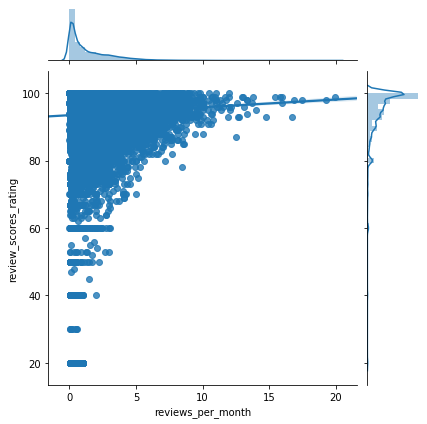

In [485]:
sns.jointplot(x=df2.reviews_per_month, y=df2.review_scores_rating, data= df, kind='reg')

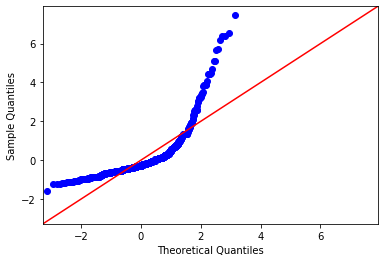

In [476]:
fig = sm.graphics.qqplot(regres_price_shared.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
# code for multiple chart with correlation between continues variables
#pd.plotting.scatter_matrix(df.iloc[:, 5:-2], figsize=(40,30))